<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://d8a-88.github.io/econ-fa19/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 12pt;"><strong>Economic Models</strong>, Spring 2020<br>
            Dr. Eric Van Dusen</p></td></tr>
</table>


<!-- BEGIN QUESTION -->

# Homework 1

<!-- END QUESTION -->

In [2]:
from datascience import *

import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact

import otter
grader = otter.Notebook()

airlines = Table.read_table("AirlinesHW.csv")
nondelta_raw = Table.read_table("NonDelta.csv")

def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)

# Introduction

The code below will be helpful for answering question 2 of this HW. 

In 2002, Delta sponsored the 2002 Olympic Winter Games at its Salt Lake City hub. Different technological innovations, such as kiosks at check-in, expanded gate information systems and virtual check-in on websites improved customer experience. Because of these two factors, consumers believed Delta was a promising airline to fly on.

Manipulate the original table to only assume Delta flights for Market Leading Airline and see if its demand curve is different from the general demand curve.

In [2]:
delta = airlines.where("Market Leading Airline", "DL")
delta = delta.select(["Average Price", "Average Weekly Passengers"])
delta = delta.relabeled(["Average Weekly Passengers", "Average Price"], ["Quantity", "Price"])
delta = delta.where(delta.column("Quantity") < 2000)

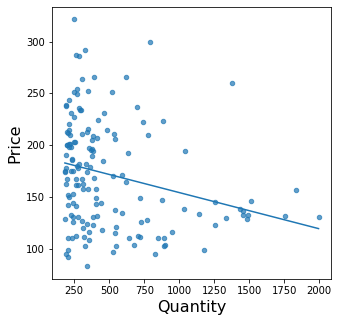

In [3]:
delta.scatter("Quantity", "Price", fit_line = True, color = "tab:blue")

In [4]:
np.polyfit(delta.column("Quantity"),delta.column("Price"),1)

array([-3.49594506e-02,  1.89076806e+02])

In [5]:
Q = sympy.Symbol('Q')

In [6]:
deltademand = -0.035 * Q + 189.1

Suppose the supply curve is $\text{Supply} = 0.03 \cdot Q + 14$. This is not based on any data; it is chosen out for the purpose of this exercise. Write its expression. 

In [7]:
deltasupply = 0.03 * Q + 14

Find the quantity equilibrium.

In [8]:
Q_star_delta = solve(deltademand, deltasupply)
Q_star_delta

2693.84615384615

Find the price equilibrium.

In [9]:
deltademand.subs(Q, Q_star_delta)
deltasupply.subs(Q, Q_star_delta)

94.8153846153846

Find the market equilibrium. Visualize it.

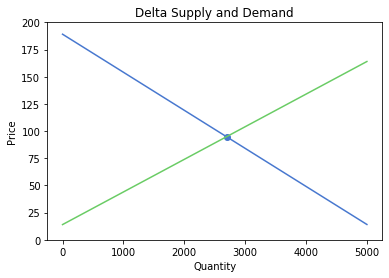

In [10]:
plot_equation(deltademand, 0, 5000)
plot_equation(deltasupply, 0, 5000)
plt.ylim(0,200)
plt.title("Delta Supply and Demand")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(deltasupply, deltademand)
plt.show()

## Question 1: SymPy Review

**Question 1.1:** Create a symbol for P_D

In [11]:
P_D = ...
P_D

Ellipsis

In [12]:
grader.check("q1_1")

AssertionError: Test q1_1 does not exist

**Question 1.2:** Create a symbol for P_S

In [ ]:
P_S = ...
P_S

In [ ]:
grader.check("q1_2")

**Question 1.3:** Write the expression $3x + 4$

In [ ]:
x = ...
exp_1 = ...
exp_1

In [ ]:
grader.check("q1_3")

**Question 1.4:** Write the expression $-2x + 5$

In [ ]:
exp_2 = ...
exp_2

In [ ]:
grader.check("q1_4")

## Question 2: Non-Delta Flights 

In the beginning of this homework, there is information regarding Delta's innovations in customer experience. This part of the question will explore non-Delta flights' demand curves and market equilibrium. 

Let's now compare Delta sales versus non-Delta sales to see if Delta's investments towards the innovations led to a difference. 

The airlines and non-Delta data have been loaded in for you as `airlines` and `nondelta`, respectively. We have also provided you with the `plot_equation` and `plot_intercept` functions.

**Question 2.1:** We will work with the "nondelta" table, which has already been uploaded. Please relabel "Average Weekly Passengers" and "Average Price" to "Quantity" and "Price" respectively.

In [ ]:
nondelta = ...
nondelta

In [ ]:
grader.check("q2_1")

<!-- BEGIN QUESTION -->

**Question 2.2:** Filter the table to only include the quantity to be less than 2000. Then, make a scatter plot. Please give a title to the graph, x-axis, and y-axis. 

In [ ]:
nondelta_below_2000 = ...
...

In [ ]:
grader.check("q2_2")

<!-- END QUESTION -->

**Question 2.3:** Find the demand curve for non-Delta flights. Don't forget to create a symbol `Q` for quantity!

In [ ]:
coeffs = ...

Q = ...
nondelta_demand = ...
nondelta_demand

In [ ]:
grader.check("q2_3")

**Question 2.4:** Use a supply curve of $0.03Q + 14$. This supply curve is not based on data; it is simply for the purpose of this exercise. Display the supply curve using SymPy. 

In [ ]:
nondelta_supply = ...
nondelta_supply

In [ ]:
grader.check("q2_4")

**Question 2.5:** Find the quantity and price equilibrium.

In [ ]:
Q_star_nondelta = ...
nondelta_price_eqm = ...
Q_star_nondelta, nondelta_price_eqm

In [ ]:
grader.check("q2_5")

<!-- BEGIN QUESTION -->

**Question 2.6:** Find the market equilibrium.

In [ ]:
plot_equation(..., 0, 6000)
plot_equation(..., 0, 6000)
plt.ylim(0,175)
plt.title("Non-Delta Supply and Demand")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(...)

**Question 2.7:** Visually compare the market equilibrium between Delta and non-Delta flights. Explain in 2-4 sentences why there was or was not a change.

In [ ]:
delta_demand = -0.035 * Q + 189 # from lab
delta_supply = 0.03 * Q + 14 # from lab
Q_star_delta = solve(delta_demand, delta_supply)
delta_demand.subs(Q, Q_star_delta)
delta_supply.subs(Q, Q_star_delta)

plot_equation(nondelta_demand, 1250, 5000, label = "Non-Delta Flights")
plot_equation(nondelta_supply, 1250, 5000)
plt.ylim(30,160)
plt.title("Delta vs Non-Delta Airlines Equilibrium")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(nondelta_supply, nondelta_demand)
plot_equation(delta_demand, 1250, 5000, label = "Delta Flights")
plot_equation(delta_supply, 1250, 5000)

plt.legend(loc = "upper right")
plt.show()

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## Question 3: Low Price Airlines and Market Equilibrium

As you will learn later in this course, there are two types of goods: normal and inferior. A normal good is a good in which the demand increases when income increases. An inferior good is the opposite: a good in which the demand decreases as income decreases. Low price airlines can be considered as inferior goods. 

**Question 3.1:** Create a new table from `airlines` with only information regarding low price airlines. You should include the columns labeled "Average Weekly Passengers", "Low Price Airline", "Market Share Low Price", and "Low Price TIcket Airline Cost". 

In [ ]:
lowprice = airlines....
lowprice

In [ ]:
grader.check("q3_1")

**Question 3.2:** Rename "Average Weekly Passengers" to "Quantity" and "Low Price TIcket Airline Cost" to "Price".  

In [ ]:
lowprice_relabeled = lowprice....
lowprice_relabeled

In [ ]:
grader.check("q3_2")

**Question 3.3:** Limit average weekly passengers up to 2000 passengers.

In [ ]:
lowprice_below_2000 = ...
lowprice_below_2000

In [ ]:
grader.check("q3_3")

**Question 3.4:** Create a scatter plot between "Average Weekly Passengers" and "Low Price Airline Ticket Cost".

In [ ]:
...

**Question 3.5:** Create a demand function for low price airlines.

In [ ]:
lowprice_coeffs = ...
lowprice_demand = ...
lowprice_demand

In [ ]:
grader.check("q3_5")

**Question 3.6:** Suppose the supply curve is $\text{Supply} = 0.05Q + 94$. This supply curve is not based on data; it is simply for the purpose of this exercise. Write the expression using SymPy.

In [ ]:
lowprice_supply = ...
lowprice_supply

In [ ]:
grader.check("q3_6")

**Question 3.7:** Find the quantity equilibrium. 

In [ ]:
Q_star = ...
Q_star

In [ ]:
grader.check("q3_7")

**Question 3.8:** Find the price equilibrium. 

In [ ]:
lowprice_price_eqm = ...
lowprice_price_eqm

In [ ]:
grader.check("q3_8")

<!-- BEGIN QUESTION -->

**Question 3.9:**  Visualize the market equilibrium. 

In [ ]:
plot_equation(..., 0, 2000)
plot_equation(..., 0, 2000)
plt.ylim(0,250)
plt.title("Low Price Airfare Supply and Demand")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(...)

<!-- END QUESTION -->

If consumers' incomes decreased, then the demand for inferior goods increases. Suppose the airfare consumers' incomes decreased. How would this demand shift look like? Use the slider from this week's lab, the skeleton for which is copied beloiw. Visualizing the slider is enough for this question. This question will not be graded. It is for your intuition. 

In [ ]:
def shift_demand():
    equation = lowprice_demand
    def shift_helper(shift):
        plot_equation(equation, 0, 10000, "Original")
        plot_equation(lowprice_supply, 0, 5000)
        old = plot_intercept(equation, lowprice_supply)
        print('Original Intercept:', old)
        
        if shift != 0:
            plot_equation(equation + shift, -10, 10000, 'Shifted')
            new = plot_intercept(equation + shift, lowprice_supply)
            print('New intercept:', new)
            print('Change in Quantity:', round(float(new[0]-old[0]), 2))
            print('Change in Price:', round(float(new[1]-old[1]), 2))
        else:
            print('Nothing shifted yet, use the slider to move the line!')
        plt.xlim(-50,1750)
        plt.ylim(0,250)
        plt.legend()
        plt.ylabel("Price")
        plt.xlabel("Quantity")
        plt.title("Change in Income and Market Equilibrium")
    interact(shift_helper, shift=(-6, 30, 2))


shift_demand()

<!-- BEGIN QUESTION -->

**Question 3.10:**  Visualize the market equilibrium for all flights with fewer than 2000 weekly passengers (from lecture) and that of low priced airlines. You should end up with a graph with 1 supply curve and 2 demand curves (1 for all airlines and 1 for low priced airlines). In 2-4 sentences, interpret what this graph means and why there is or is not a difference between the two market equilibriums. Suppose the demand function for all flights is as follows: 

In [ ]:
airline_demand = -0.026 * Q + 178.5
airline_demand

In [ ]:
Q_star_allairlines = solve(airline_demand, lowprice_supply)
airline_demand.subs(Q, Q_star_allairlines)

In [ ]:
plot_equation(airline_demand, 0, 6000, "All Airlines")
plot_equation(lowprice_demand, 0, 6000, "Low Price Airlines")
plot_equation(lowprice_supply, 0, 6000)
plt.ylim(0,300)
plt.title("All Airlines vs Low Price Airlines")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend()
plot_intercept(lowprice_supply, lowprice_demand) 

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---

Congrats on finishing a notebook! To double-check your work, the cell below will rerun all of the autograder tests for you.

In [ ]:
grader.check_all()

## Submission

Congrats on finishing a homework notebook! To turn in this homework assignment, click the **Save** icon at the top, **save this file** by going to File > Download As and select **Notebook**; then, run the cell below to generate a PDF of this assignment and download it. Submit this assignment by uploading **BOTH the .ipynb and .pdf files** to Gradescope.

In [3]:
grader.export("hw01.ipynb", filter_type="tags")